In [29]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터\\")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('Training Case 1.csv', encoding='CP949')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
변경 후 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
현재 폴더 파일 :  ['Block perspective.csv', 'CHE I perspective.csv', 'CHE II perspective.csv', 'Container Data.csv', 'Container DS Data.csv', 'Container DS perspective.csv', 'Container LD perspective.csv', 'Container perspective.csv', 'Crawling DS Container.csv', 'Data.csv', 'DS.csv', 'DStoLD.csv', 'Dwell Time', 'Gate perspective.csv', 'GI perspective.csv', 'GO perspective.csv', 'ITV perspective.csv', 'LD.csv', 'Outlier DS.csv', 'Outlier LD.csv', 'QC perspective.csv', 'Training Case 1.csv', 'Vessel perspective.csv', 'Weather.csv', '이상치.csv']
feature 항목 :  Index(['CONTAINER_NO', 'VESSEL_ID', 'COUNTRY_POD', 'CITY_POD', 'Full/Empty',
       'BLOCK', 'BAY', 'YC_ID', 'YT_ID', 'QC_ID', 'QUEUE_POSITION_NUMBER',
       'QUEUE_POSITION_HACK_DACK', 'H_BOX', 'WEIGHT', 'SIZE', 'FREEZE', 'IMDG',
       'UNNO', 'CARGO_MANAGEMENT_NUM', 'SEAL_NUM', 'COMPANY', 'IMPORT/EXPORT',
       'T/S', 'TEMPERATURE', 

,CONTAINER_NO,VESSEL_ID,COUNTRY_POD,CITY_POD,Full/Empty,BLOCK,BAY,YC_ID,YT_ID,QC_ID,...,IMPORT/EXPORT,T/S,TEMPERATURE,HUMIDITY,RAIN,WIND_SPEED,PRECIPITATION,DAY,TRUCK IN PROCESS,Moving Time
0,UESU,SXNW,KR,PUS,F,2B,74,TC224,YT529,GC110,...,T/S Local,자부두,-1.9,30.7,0,2.4,0.0,Monday,60,15.066667
1,UESU,SXNW,KR,PUS,F,1C,10,TC231,YT526,GC109,...,T/S Import,타부두,-1.9,30.7,0,2.4,0.0,Monday,55,15.400000
2,TRLU,SXNW,KR,PUS,F,1F,40,TC261,YT504,GC111,...,T/S Import,타부두,-1.9,30.7,0,2.4,0.0,Monday,49,14.916667
3,TNZU,SXNW,KR,PUS,F,2C,98,TC234,YT505,GC112,...,T/S Local,자부두,-2.6,32.7,0,2.4,0.0,Monday,23,11.483333
4,TGHU,SXNW,KR,PUS,F,1F,80,TC262,YT527,GC111,...,T/S Import,타부두,-1.1,28.5,0,2.3,0.0,Monday,59,17.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73568,BMOU,MHAH,KR,PUS,F,3B,87,TC226,YT540,GC111,...,T/S Local,자부두,0.1,44.3,0,1.9,0.0,Saturday,15,13.666667
73569,BMOU,MAUO,KR,PUS,F,1B,87,TC222,YT552,GC111,...,T/S Local,자부두,-2.4,41.0,0,0.6,0.0,Saturday,50,17.250000
73570,BMOU,MAUO,KR,PUS,F,2B,83,TC224,YT560,GC112,...,T/S Local,자부두,-3.2,50.5,0,0.6,0.0,Saturday,37,19.016667
73571,BMOU,MAUO,KR,PUS,F,3B,87,TC226,YT588,GC109,...,T/S Local,자부두,-3.2,50.5,0,0.6,0.0,Saturday,42,11.700000


In [30]:
data['Moving Time'].describe()

count    73573.000000
mean        13.257351
std          5.198065
min          3.216667
25%          9.433333
50%         13.416667
75%         15.866667
max        523.166667
Name: Moving Time, dtype: float64

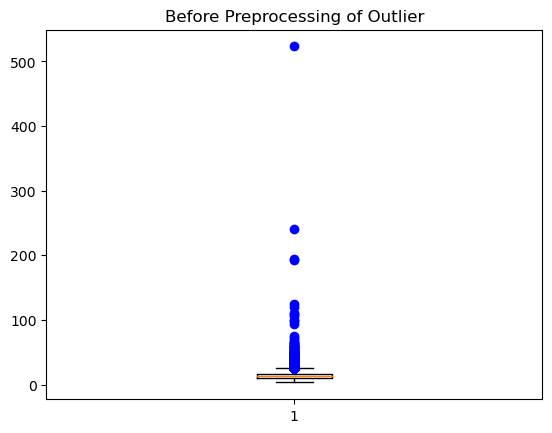

In [31]:
plt.boxplot(data['Moving Time'], sym="bo")
plt.title('Before Preprocessing of Outlier')
#plt.xticks([1], ['MOving Time'])

plt.show()

<AxesSubplot:ylabel='Moving Time'>

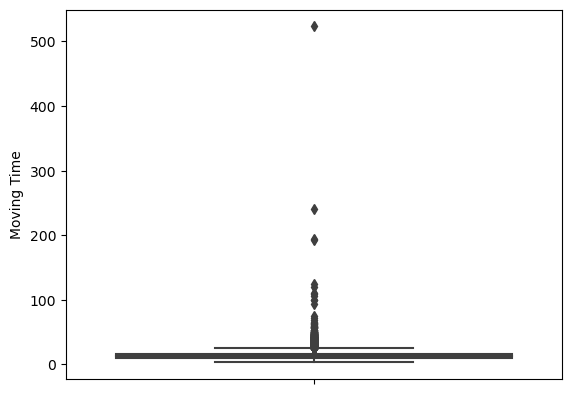

In [32]:
sns.boxplot(data=data, y='Moving Time')


In [33]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [34]:
# 이상치 전처리 
 
outlier_idx = get_outlier(df=data, column='Moving Time', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)


In [35]:
print(data.shape)

(72646, 31)


In [36]:
data['Moving Time'].describe()

count    72646.000000
mean        12.999237
std          4.018751
min          3.216667
25%          9.400000
50%         13.350000
75%         15.750000
max         25.516667
Name: Moving Time, dtype: float64

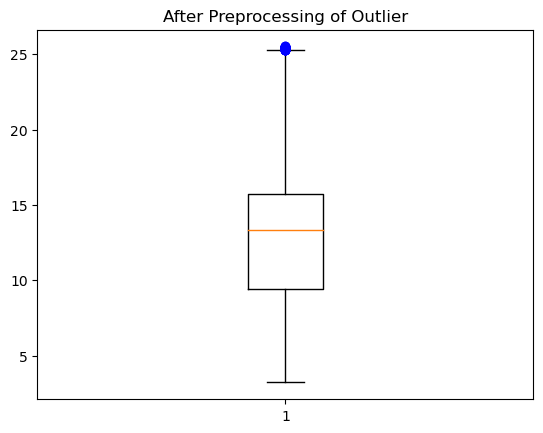

In [37]:
plt.boxplot(data['Moving Time'], sym="bo")
plt.title('After Preprocessing of Outlier')
#plt.xticks([1], ['MOving Time'])

plt.show()

c:\Users\hyunj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hyunj\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


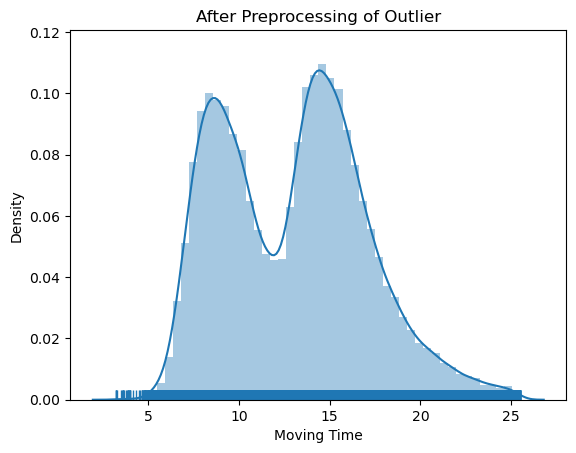

In [40]:
sns.distplot(data['Moving Time'], kde=True, rug=True)
plt.title("After Preprocessing of Outlier")
plt.show()